# 감정 분석(Sentiment Analysis)

* 감정 분석은 텍스트에 등장하는 단어들을 통해 어떤 감정이 드러나는지 분석하는 기법
* 감정 분석은 오피니언 마이닝으로도 불리며, 텍스트에 담긴 의견, 태도 등을 알아보는데 유용한 기법
* 감정 분석을 하기 위해선 미리 정의된 감정 어휘 사전이 필요
* 감정 어휘 사전에 포함된 어휘가 텍스트에 얼마나 분포하는지에 따라 해당 텍스트의 감정이 좌우
* 토픽 모델링이 텍스트의 주제를 찾아낸다면, 감정 분석은 텍스트의 의견을 찾아냄
* 텍스트는 주제(토픽)와 의견(감정)의 결합으로 이루어졌다고 볼 수 있음

![2655364B5925AC9606[1].png](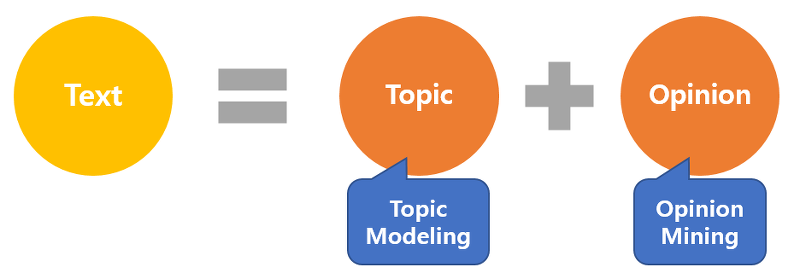)

* 감정 분석은 SNS, 리뷰 분석에 유용하게 사용할 수 있음
* 특정 이슈에 대한 사람들의 감정을 실시간으로 분석한다면, 그에 대해 신속하게 대처 가능

* 파이썬으로 감정 분석하는 방법은 크게 두 가지로 구분
  + 감정 어휘 사전을 이용한 감정 상태 분류
    -  미리 분류해둔 감정어 사전을 통해 분석하고자 하는 텍스트의 단어들을 사전에 기반해 분류하고, 그 감정가를 계산
    - 이 때 사용되는 감정어 사전에는 해당 감정에 해당되는 단어를 미리 정의해둬야 함
  + 기계학습을 이용한 감정 상태 분류
    - 분석 데이터의 일부를 훈련 데이터로 사용해 그로부터 텍스트의 감정 상태를 분류
    - 이 때 사용되는 훈련 데이터는 사용자가 분류한 감정 라벨이 포함되어 있어야 하며,  
이를 인공 신경망, 의사 결정 트리 등의 기계 학습 알고리즘을 사용하여 분류

## 감정 어휘 사전을 이용한 감정 상태 분류

### 감정 사전 준비

*   감정 사전 라이브러리를 설치
*   afinn은 영어에 대한 긍정, 부정에 대한 감정 사전을 제공


In [1]:
!pip install afinn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53429 sha256=10657d9b42c5a78dbf8e306e835368f4f81c54b8768e497fb1a9a94d634fd2f3
  Stored in directory: /root/.cache/pip/wheels/b0/05/90/43f79196199a138fb486902fceca30a2d1b5228e6d2db8eb90
Successfully built afinn


### 데이터 준비

1.   사용할 데이터를 구성
2.   데이터는 사이킷런에 내장되어 있는 뉴스그룹 데이터를 이용

In [2]:
from sklearn.datasets import fetch_20newsgroups

newsdata = fetch_20newsgroups(subset='train')
newsdata.data[0]

"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

### 감정 상태 분류 및 시각화

*   감정 사전을 구성하고 감정 스코어를 측정
*   afinn 라이브러리는 감정 사전과 더불어 편리하게 감정가를 계산할 수 있는 함수를 제공

In [3]:
from afinn import Afinn

afinn = Afinn()
for i in range(10):
    print(afinn.score(newsdata.data[i]))

7.0
11.0
16.0
5.0
-23.0
-25.0
7.0
3.0
16.0
-20.0


*   모든 뉴스에 대한 감정을 시각화
*   긍정과 부정에 대한 갯수를 시각화



<ipython-input-4-a9f5b7788dd7>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


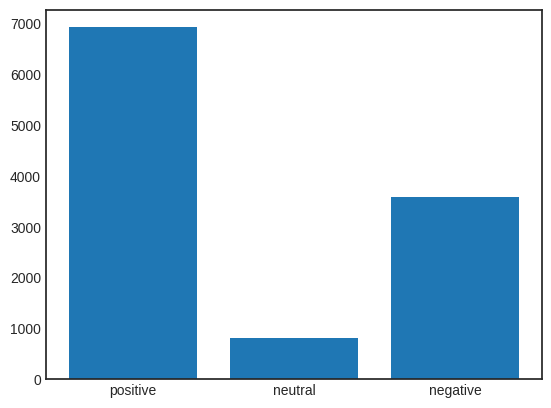

In [4]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

positive = 0
neutral = 0
negative = 0

for i in newsdata.data:
    score = afinn.score(i)
    if score > 0:
        positive += 1
    elif score == 0:
        neutral += 1
    else:
        negative += 1

plt.bar(np.arange(3), [positive, neutral, negative])
plt.xticks(np.arange(3), ['positive', 'neutral', 'negative'])
plt.show()

In [5]:
newsdata.data.__len__()

11314

## 기계학습을 이용한 감정 분석

#### 한국어 자연어 처리 konlpy와 형태소 분석기 MeCab 설치

* https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh

In [ ]:
!pip install konlpy

In [ ]:
# Mecab 설치
!apt-get update
!apt-get install g++ openjdk-8-jdk
!pip3 install konlpy JPype1-py3
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

# mecab-python의 버전 오류로 인해 아래 패키지를 설치하면 코랩에서 Mecab을 사용가능
!pip install mecab-python3

In [8]:
import re
import urllib.request
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from konlpy.tag import Mecab
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

### 네이버 영화 리뷰 데이터

* 참고: https://wikidocs.net/44249

#### 데이터 로드

* 데이터를 웹에서 바로 받아오기 위해 `urllib.request` 사용
  + https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt
  + https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt
* 받아온 데이터를 `dataframe`으로 변환하고 데이터를 확인



In [9]:
train_file = urllib.request.urlopen("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt")
test_file = urllib.request.urlopen("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt")

train_data = pd.read_table(train_file)
test_data = pd.read_table(test_file)

train_data[:5]

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


#### 중복 및 결측치 처리

*   데이터 개수 확인
*   데이터에 중복이 존재한다면 이를 제거



In [10]:
train_data['document'].duplicated().sum()

3817

In [11]:
print(train_data['document'].nunique())
print(train_data['label'].nunique())

train_data.drop_duplicates(subset=['document'], inplace=True)

146182
2


In [12]:
train_data['document'].duplicated().sum()

0

In [13]:
print(train_data.isnull().sum())

train_data = train_data.dropna(how='any')

id          0
document    1
label       0
dtype: int64


#### 데이터 정제



*   데이터에서 한글과 공백을 제외하고 모두 제거



In [14]:
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣]", " ")
train_data[:10]

<ipython-input-14-37d78c2d0bc7>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣]", " ")


,id,document,label
0,9976970,아 더빙 진짜 짜증나네요 목소리,0
1,3819312,흠 포스터보고 초딩영화줄 오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 솔직히 재미는 없다 평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화 스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
5,5403919,막 걸음마 뗀 세부터 초등학교 학년생인 살용영화 ㅋㅋㅋ 별반개도 아까움,0
6,7797314,원작의 긴장감을 제대로 살려내지못했다,0
7,9443947,별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지 정말 발로해도 그것보단...,0
8,7156791,액션이 없는데도 재미 있는 몇안되는 영화,1
9,5912145,왜케 평점이 낮은건데 꽤 볼만한데 헐리우드식 화려함에만 너무 길들여져 있나,1


In [15]:
train_data['document'].replace('', np.nan, inplace=True)
print(len(train_data))
print(train_data.isnull().sum())

146182
id          0
document    0
label       0
dtype: int64


In [16]:
train_data = train_data.dropna(how='any')
print(len(train_data))

146182


In [17]:
test_data.drop_duplicates(subset=['document'], inplace=True)
test_data['document'] = test_data['document'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣]', '')
test_data['document'].replace('', np.nan, inplace=True)
test_data = test_data.dropna(how='any')


<ipython-input-17-ed481e6a7f37>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  test_data['document'] = test_data['document'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣]', '')


#### 토큰화 및 불용어 제거



* 단어들을 분리하고 불용어를 제거함
* 불용어 사전: `'의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다'`



In [18]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [21]:
mecab = Mecab()

X_train = []
for sentence in train_data['document']:
    X_train.append([word for word in mecab.morphs(sentence) if not word in stopwords])


In [22]:
print(X_train[:1])

[['아', '더', '빙', '진짜', '짜증', '나', '네요', '목소리']]


In [24]:
X_test = []
for sentence in test_data['document']:
    X_test.append([word for word in mecab.morphs(sentence) if not word in stopwords])

In [25]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
print(tokenizer.word_index)

{'영화': 1, '다': 2, '고': 3, '하': 4, '을': 5, '보': 6, '게': 7, '지': 8, '있': 9, '없': 10, '좋': 11, '나': 12, '었': 13, '만': 14, '는데': 15, '너무': 16, '봤': 17, '적': 18, '안': 19, '로': 20, '정말': 21, '음': 22, '것': 23, '아': 24, '네요': 25, '어': 26, '재밌': 27, '지만': 28, '같': 29, '진짜': 30, '기': 31, '에서': 32, '했': 33, '점': 34, '네': 35, '않': 36, '거': 37, '았': 38, '수': 39, '되': 40, '면': 41, 'ㅋㅋ': 42, '인': 43, '말': 44, '연기': 45, '주': 46, '최고': 47, '내': 48, '평점': 49, '이런': 50, '던': 51, '어요': 52, '할': 53, '왜': 54, '겠': 55, '스토리': 56, '해': 57, '습니다': 58, 'ㅋㅋㅋ': 59, '듯': 60, '아니': 61, '드라마': 62, '생각': 63, '더': 64, '그': 65, '싶': 66, '사람': 67, '때': 68, '감동': 69, '배우': 70, '함': 71, '본': 72, '까지': 73, '보다': 74, '뭐': 75, '알': 76, '내용': 77, '만들': 78, '볼': 79, '감독': 80, '라': 81, '재미': 82, '그냥': 83, '시간': 84, '중': 85, '지루': 86, '재미있': 87, '년': 88, '였': 89, '잼': 90, '사랑': 91, '못': 92, '재미없': 93, '냐': 94, '쓰레기': 95, '서': 96, '니': 97, '라고': 98, '면서': 99, '다시': 100, '번': 101, '나오': 102, '야': 103, '작품': 104, '하나': 105, '이거': 1

#### 빈도 수가 낮은 단어 제거



*   빈도 수가 낮은 단어는 학습에 별로 영향을 주지 않음
*   처리를 통해 빈도 수가 낮은 단어들은 제거



In [26]:
threshold = 3

words_cnt = len(tokenizer.word_index)
rare_cnt = 0

words_freq = 0
rare_freq = 0

for key, value in tokenizer.word_counts.items():
    words_freq = words_freq + value

    if value < threshold:
        rare_cnt += 1
        rare_freq = rare_freq + value
print('전체 단어 수 :', words_cnt)
print('빈도가 {} 이하인 희귀 단어 수 : {}'.format(threshold-1, rare_cnt))
print('희귀 단어 비율: {}'.format((rare_cnt / words_cnt)*100 ))
print('희귀 단어 등장 빈도 비율: {}'.format((rare_freq / words_freq) * 100))

전체 단어 수 : 49022
빈도가 2 이하인 희귀 단어 수 : 27483
희귀 단어 비율: 56.06258414589368
희귀 단어 등장 빈도 비율: 1.7087420356508436


In [31]:
# 0번째 패딩과 out of vocab token(oov_token)을 넣어야해서 2개를 더해준다
vocab_size = words_cnt-rare_cnt+2
print(vocab_size)

21541


In [32]:
# vocab_size를 지정하면 데이터에서의 등장 빈도에 따라 정렬되며, 가장 빈도가 높은 단어들이 먼저 어휘 사전에 포함된다.

tokenizer = Tokenizer(vocab_size, oov_token='OOV')
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [33]:
y_train = np.array(train_data['label'])
y_test = np.array(test_data['label'])

In [41]:
sorted(tokenizer.word_counts.items(),key=lambda x:x[1],reverse=True)

[('영화', 57389),
 ('다', 54599),
 ('고', 46841),
 ('하', 44771),
 ('을', 29852),
 ('보', 25026),
 ('게', 22168),
 ('지', 19116),
 ('있', 16681),
 ('없', 15795),
 ('좋', 13637),
 ('나', 12743),
 ('었', 12164),
 ('만', 11734),
 ('는데', 11387),
 ('너무', 10974),
 ('봤', 10221),
 ('적', 10101),
 ('안', 10073),
 ('로', 9973),
 ('정말', 9750),
 ('음', 9275),
 ('것', 9269),
 ('아', 9110),
 ('네요', 8992),
 ('어', 8780),
 ('재밌', 8751),
 ('지만', 8736),
 ('같', 8582),
 ('진짜', 8300),
 ('기', 8074),
 ('에서', 8070),
 ('했', 8026),
 ('점', 7913),
 ('네', 7806),
 ('않', 7726),
 ('거', 7681),
 ('았', 7612),
 ('수', 7524),
 ('되', 7471),
 ('면', 7320),
 ('ㅋㅋ', 7197),
 ('인', 7113),
 ('말', 6876),
 ('연기', 6833),
 ('주', 6436),
 ('최고', 6301),
 ('내', 6284),
 ('평점', 6248),
 ('이런', 5989),
 ('던', 5929),
 ('어요', 5685),
 ('할', 5574),
 ('왜', 5517),
 ('겠', 5490),
 ('스토리', 5422),
 ('해', 5422),
 ('습니다', 5333),
 ('ㅋㅋㅋ', 5311),
 ('듯', 5261),
 ('아니', 5189),
 ('드라마', 5168),
 ('생각', 5152),
 ('더', 5128),
 ('그', 5122),
 ('싶', 5045),
 ('사람', 5033),
 ('때', 4846),
 ('

In [36]:
drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1 ]

X_train = np.delete(X_train, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)

print(len(X_train))
print(len(y_train))

145379
145379


#### 패딩



*   리뷰의 전반적인 길이를 확인
*   모델의 입력을 위해 동일한 길이로 맞춰줌



In [43]:
print('리뷰 최대 길이:', max(len(l) for l in X_train))
print('리뷰 평균 길이:', sum(len(l) for l in X_train)/ len(X_train))

리뷰 최대 길이: 83
리뷰 평균 길이: 13.831681329490504


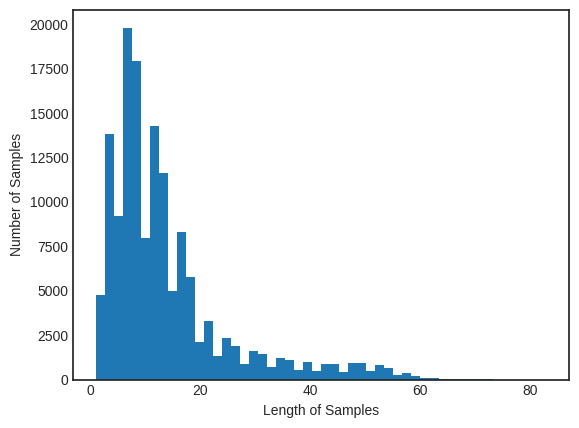

In [44]:
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('Length of Samples')
plt.ylabel('Number of Samples')
plt.show()

In [45]:
max_len = 60

In [46]:
# embedding을 하려면 길이를 맞춰야 한다

X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

X_train[4]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     1,  8463,  1051,    46,  2699,    52,     2,
        2626,    33,  1123,    27,   324,    32,    15,    34,    52,
       15284,     1,   394,  2989,  1672,     3], dtype=int32)

#### 모델 구축 및 학습

*   감정 상태 분류 모델을 선언하고 학습
*   모델은 일반적인 LSTM 모델을 사용



In [47]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential

In [48]:
model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics = ['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         2154100   
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 2271477 (8.66 MB)
Trainable params: 2271477 (8.66 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [49]:
history = model.fit(X_train, y_train,
                    epochs=15,
                    batch_size=60,
                    validation_split=0.2)

Epoch 1/15
1939/1939 [==============================] - 44s 21ms/step - loss: 0.4087 - acc: 0.8119 - val_loss: 0.3754 - val_acc: 0.8315
Epoch 2/15
1939/1939 [==============================] - 17s 9ms/step - loss: 0.3383 - acc: 0.8533 - val_loss: 0.3399 - val_acc: 0.8498
Epoch 3/15
1939/1939 [==============================] - 17s 9ms/step - loss: 0.3070 - acc: 0.8705 - val_loss: 0.3271 - val_acc: 0.8571
Epoch 4/15
1939/1939 [==============================] - 16s 8ms/step - loss: 0.2842 - acc: 0.8826 - val_loss: 0.3209 - val_acc: 0.8597
Epoch 5/15
1939/1939 [==============================] - 16s 8ms/step - loss: 0.2640 - acc: 0.8937 - val_loss: 0.3329 - val_acc: 0.8577
Epoch 6/15
1939/1939 [==============================] - 15s 8ms/step - loss: 0.2454 - acc: 0.9034 - val_loss: 0.3332 - val_acc: 0.8599
Epoch 7/15
1939/1939 [==============================] - 16s 8ms/step - loss: 0.2273 - acc: 0.9122 - val_loss: 0.3431 - val_acc: 0.8578
Epoch 8/15
1939/1939 [==============================] 

#### 시각화

In [51]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

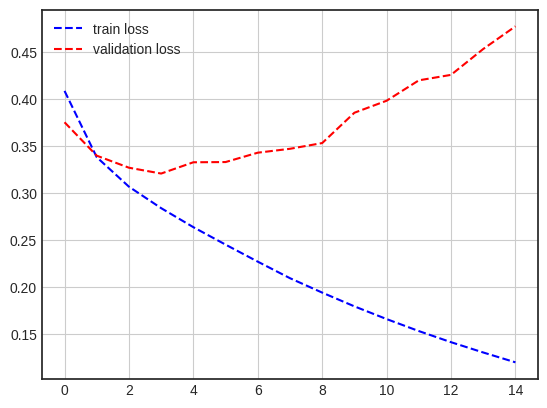

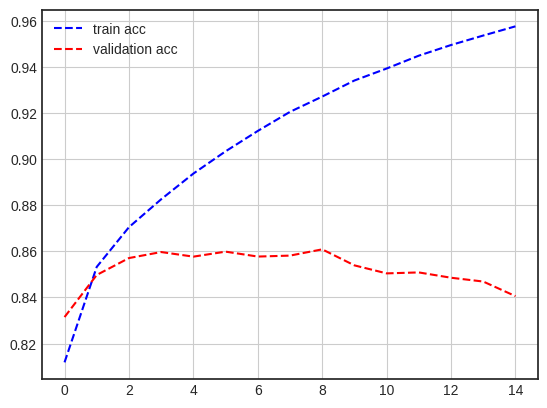

In [55]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = np.arange(len(loss))

plt.plot(epochs, loss, 'b--', label='train loss')
plt.plot(epochs, val_loss, 'r--', label='validation loss')
plt.grid()
plt.legend()

plt.figure()
plt.plot(epochs, acc, 'b--', label='train acc')
plt.plot(epochs, val_acc, 'r--', label='validation acc')
plt.grid()
plt.legend()

plt.show()


In [59]:
# 오버피팅이 되었다

model.evaluate(X_test,y_test)

1527/1527 [==============================] - 7s 4ms/step - loss: 0.4883 - acc: 0.8346


[0.48825839161872864, 0.8345820307731628]

#### 감정 예측

In [67]:
def sentiment_predict(new_sentence):
    new_token = [word for word in mecab.morphs(new_sentence) if not word in stopwords]
    new_sequences = tokenizer.texts_to_sequences([new_token]) # []로 감싸줘야 한다
    new_pad = pad_sequences(new_sequences, maxlen=max_len)
    score = float(model.predict(new_pad))

    if score > 0.5:
        print('{} - > 긍정({:.2f}%)'.format(new_sentence, score*100))
    else:
        print('{} - > 부정({:.2f}%)'.format(new_sentence, (1-score)*100))

In [68]:
sentiment_predict('정말 재미있고 흥미진진 했어요')
sentiment_predict('어떻게 이렇게 지루하고 재미없죠?')
sentiment_predict('배우 연기력이 대박입니다.')
sentiment_predict('분위기가 어둡고 스토리가 복잡해요.')
sentiment_predict('대박')
sentiment_predict('노잼')

1/1 [==============================] - 0s 18ms/step
정말 재미있고 흥미진진 했어요 - > 긍정(98.19%)
1/1 [==============================] - 0s 17ms/step
어떻게 이렇게 지루하고 재미없죠? - > 부정(99.06%)
1/1 [==============================] - 0s 17ms/step
배우 연기력이 대박입니다. - > 긍정(95.89%)
1/1 [==============================] - 0s 17ms/step
분위기가 어둡고 스토리가 복잡해요. - > 긍정(96.70%)
1/1 [==============================] - 0s 18ms/step
대박 - > 긍정(95.07%)
1/1 [==============================] - 0s 19ms/step
노잼 - > 부정(99.11%)


### 네이버 쇼핑 리뷰 데이터

* 참고: https://wikidocs.net/94600

#### 데이터 로드

In [70]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/bab2min/corpus/master/sentiment/naver_shopping.txt", filename='shopping.txt')

('shopping.txt', <http.client.HTTPMessage at 0x7b2c36a50eb0>)

In [82]:
!ls

sample_data  shopping.txt


In [76]:
total_data = pd.read_table('shopping.txt', names=['ratings','reviews'])
print(len(total_data))

200000


In [74]:
total_data[:4]

,ratings,reviews
0,5,배공빠르고 굿
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...


#### 훈련 데이터와 테스트 데이터 분리

In [85]:
#total_data['label'] = np.select([total_data.ratings > 3], [1], default=0)

total_data['label'] = np.where(total_data['ratings'] > 3, 1, 0)

In [86]:
total_data

,ratings,reviews,label
0,5,배공빠르고 굿,1
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고,0
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...,1
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...,0
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ,1
...,...,...,...
199995,2,장마라그런가!!! 달지않아요,0
199996,5,다이슨 케이스 구매했어요 다이슨 슈퍼소닉 드라이기 케이스 구매했어요가격 괜찮고 배송...,1
199997,5,로드샾에서 사는것보다 세배 저렴하네요 ㅜㅜ 자주이용할께요,1
199998,5,넘이쁘고 쎄련되보이네요~,1


In [87]:
total_data['ratings'].nunique(), total_data['reviews'].nunique(), total_data['label'].nunique()

(4, 199908, 2)

In [88]:
print(len(total_data))
total_data.drop_duplicates(subset=['reviews'], inplace=True)
print(len(total_data))

200000
199908


#### 레이블의 분포 확인

In [89]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(total_data, test_size=0.25, random_state=111)
print(len(train_data))
print(len(test_data))

149931
49977


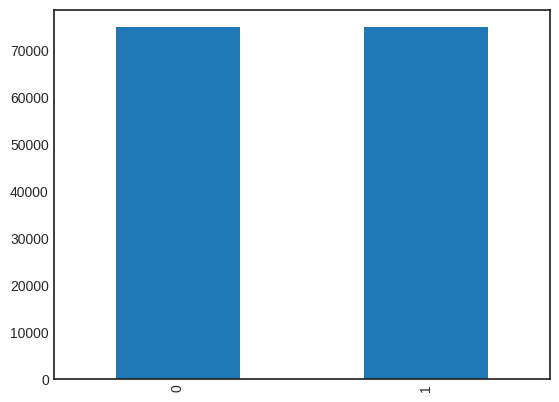

In [91]:
train_data['label'].value_counts().plot(kind='bar');

In [92]:
train_data.groupby('label').size().reset_index(name='count')

,label,count
0,0,74974
1,1,74957


#### 데이터 정제

In [93]:
print(len(train_data))
train_data['reviews'] = train_data['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣]", "")
train_data['reviews'].replace('', np.nan, inplace=True)
print(len(train_data))

print('-------------------')

print(len(test_data))
test_data['reviews'] = test_data['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣]", "")
test_data['reviews'].replace('', np.nan, inplace=True)
print(len(test_data))


149931


<ipython-input-93-8ab89d59e089>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['reviews'] = train_data['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣]", "")


149931
-------------------
49977
49977


<ipython-input-93-8ab89d59e089>:9: FutureWarning: The default value of regex will change from True to False in a future version.
  test_data['reviews'] = test_data['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣]", "")


#### 토큰화 및 불용어 제거

* 불용어 사전: `'도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게'`

In [94]:
stopwords = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게']

In [95]:
mecab = Mecab()

train_data['reviews'] = train_data['reviews'].apply(lambda x: [item for item in mecab.morphs(x) if item not in stopwords])
test_data['reviews'] = test_data['reviews'].apply(lambda x: [item for item in mecab.morphs(x) if item not in stopwords])


In [104]:
train_data['label'].values

array([1, 0, 1, ..., 1, 1, 1])

In [105]:
X_train = train_data['reviews'].values
y_train = train_data['label'].values
X_test = test_data['reviews'].values
y_test = test_data['label'].values

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(149931,)
(149931,)
(49977,)
(49977,)


#### 빈도 수가 낮은 단어 제거



*   빈도 수가 낮은 단어는 학습에 별로 영향을 주지 않음
*   처리를 통해 빈도 수가 낮은 단어들은 제거



In [14]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [106]:
threshold = 3

words_cnt = len(tokenizer.word_index)
rare_cnt = 0

words_freq = 0
rare_freq = 0

for key, value in tokenizer.word_counts.items():
    words_freq = words_freq + value

    if value < threshold:
        rare_cnt += 1
        rare_freq = rare_freq + value
print('전체 단어 수 :', words_cnt)
print('빈도가 {} 이하인 희귀 단어 수 : {}'.format(threshold-1, rare_cnt))
print('희귀 단어 비율: {}'.format((rare_cnt / words_cnt)*100 ))
print('희귀 단어 등장 빈도 비율: {}'.format((rare_freq / words_freq) * 100))

전체 단어 수 : 49023
빈도가 2 이하인 희귀 단어 수 : 27483
희귀 단어 비율: 56.06144054831405
희귀 단어 등장 빈도 비율: 1.7087420356508436


In [107]:
vocab_size = words_cnt - rare_cnt + 2
print(vocab_size)

21542


In [108]:
tokenizer = Tokenizer(vocab_size, oov_token='OOV')
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [109]:
X_train[:2]

[[5439, 3, 265, 15, 1414, 107],
 [84,
  106,
  263,
  93,
  10,
  27,
  16,
  2,
  604,
  257,
  204,
  536,
  1528,
  3171,
  1585,
  365,
  205,
  268,
  564,
  757,
  1195,
  79,
  37,
  142,
  137,
  5928,
  1579,
  93,
  530,
  49,
  59,
  5190,
  2,
  98]]

In [110]:
print(X_test[:2])

[[12, 68, 2, 44, 338, 73, 24, 22, 4178, 241, 2], [1063, 2515, 3033, 706, 717, 9, 101, 52, 19, 49, 83]]


#### 패딩

In [111]:
print('리뷰 최대 길이:', max(len(l) for l in X_train))
print('리뷰 평균 길이:', sum(len(l) for l in X_train)/ len(X_train))

리뷰 최대 길이: 85
리뷰 평균 길이: 14.81995718030294


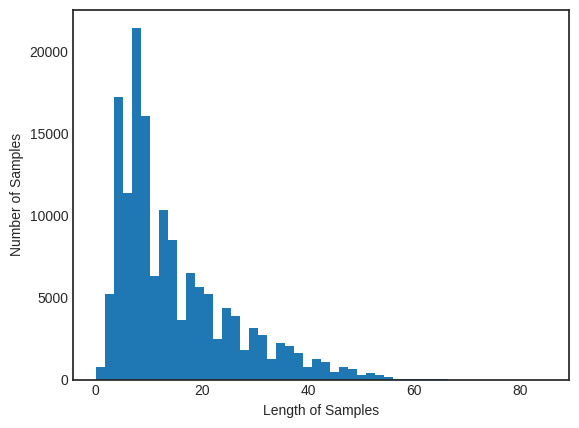

In [112]:
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('Length of Samples')
plt.ylabel('Number of Samples')
plt.show()

In [113]:
max_len = 60

In [114]:
# embedding을 하려면 길이를 맞춰야 한다

X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

X_train[4]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
        700,   71,    5, 4385,  903], dtype=int32)

In [115]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Embedding, Dense, GRU
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [116]:
model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(GRU(128))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 100)         2154200   
                                                                 
 gru (GRU)                   (None, 128)               88320     
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 2242649 (8.56 MB)
Trainable params: 2242649 (8.56 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [117]:
es = EarlyStopping(monitor='val_loss',mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [118]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(X_train, y_train,
                    epochs=15,
                    callbacks=[es,mc],
                    batch_size=60,
                    validation_split=0.2)

Epoch 1/15
2000/2000 [==============================] - ETA: 0s - loss: 0.3022 - acc: 0.8804
Epoch 1: val_acc improved from -inf to 0.90246, saving model to best_model.h5
2000/2000 [==============================] - 49s 23ms/step - loss: 0.3022 - acc: 0.8804 - val_loss: 0.2621 - val_acc: 0.9025
Epoch 2/15
   1/2000 [..............................] - ETA: 18s - loss: 0.3425 - acc: 0.8833

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2000/2000 [==============================] - ETA: 0s - loss: 0.2376 - acc: 0.9117
Epoch 2: val_acc improved from 0.90246 to 0.90976, saving model to best_model.h5
2000/2000 [==============================] - 25s 13ms/step - loss: 0.2376 - acc: 0.9117 - val_loss: 0.2429 - val_acc: 0.9098
Epoch 3/15
2000/2000 [==============================] - ETA: 0s - loss: 0.2154 - acc: 0.9210
Epoch 3: val_acc improved from 0.90976 to 0.91043, saving model to best_model.h5
2000/2000 [==============================] - 17s 9ms/step - loss: 0.2154 - acc: 0.9210 - val_loss: 0.2432 - val_acc: 0.9104
Epoch 4/15
2000/2000 [==============================] - ETA: 0s - loss: 0.2014 - acc: 0.9268
Epoch 4: val_acc improved from 0.91043 to 0.91190, saving model to best_model.h5
2000/2000 [==============================] - 22s 11ms/step - loss: 0.2014 - acc: 0.9268 - val_loss: 0.2347 - val_acc: 0.9119
Epoch 5/15
2000/2000 [==============================] - ETA: 0s - loss: 0.1894 - acc: 0.9317
Epoch 5: val_acc did n

#### 모델 구축 및 학습

In [120]:
!ls

best_model.h5  sample_data  shopping.txt


In [119]:
loaded_model = load_model('best_model.h5')
loaded_model.evaluate(X_test, y_test)

Exception ignored in: <function _xla_gc_callback at 0x7b2c546fec20>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 101, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


1562/1562 [==============================] - 6s 4ms/step - loss: 0.2339 - acc: 0.9159


[0.23390500247478485, 0.9159413576126099]

#### 시각화

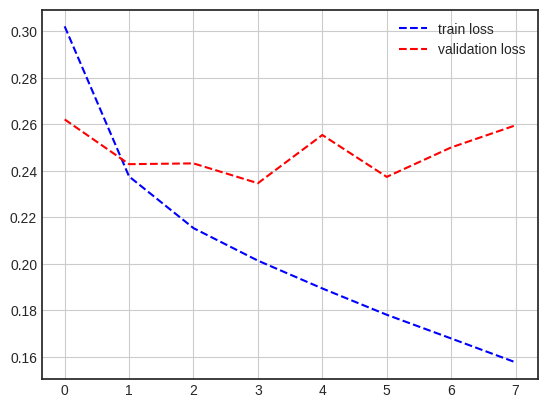

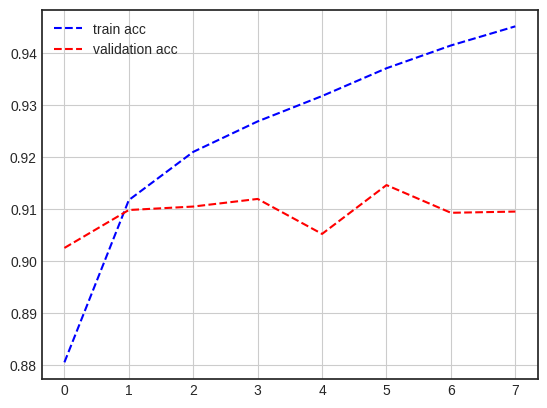

In [121]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = np.arange(len(loss))

plt.plot(epochs, loss, 'b--', label='train loss')
plt.plot(epochs, val_loss, 'r--', label='validation loss')
plt.grid()
plt.legend()

plt.figure()
plt.plot(epochs, acc, 'b--', label='train acc')
plt.plot(epochs, val_acc, 'r--', label='validation acc')
plt.grid()
plt.legend()

plt.show()


#### 감정 예측

In [122]:
def sentiment_predict(new_sentence):
    new_token = [word for word in mecab.morphs(new_sentence) if not word in stopwords]
    new_sequences = tokenizer.texts_to_sequences([new_token]) # []로 감싸줘야 한다
    new_pad = pad_sequences(new_sequences, maxlen=max_len)
    score = float(loaded_model.predict(new_pad))

    if score > 0.5:
        print('{} - > 긍정({:.2f}%)'.format(new_sentence, score*100))
    else:
        print('{} - > 부정({:.2f}%)'.format(new_sentence, (1-score)*100))

In [125]:
sentiment_predict('처음 써봤는데 대박 좋아요.')
sentiment_predict('원래 배송이 이렇게 늦나요?')
sentiment_predict('좋네요 추가 구매 의향 있습니다.')
sentiment_predict('이거 정말 실망이네요.')
sentiment_predict('이게뭐죠.')

1/1 [==============================] - 0s 27ms/step
처음 써봤는데 대박 좋아요. - > 긍정(97.87%)
1/1 [==============================] - 0s 37ms/step
원래 배송이 이렇게 늦나요? - > 부정(97.96%)
1/1 [==============================] - 0s 55ms/step
좋네요 추가 구매 의향 있습니다. - > 긍정(96.30%)
1/1 [==============================] - 0s 28ms/step
이거 정말 실망이네요. - > 부정(99.59%)
1/1 [==============================] - 0s 41ms/step
이게뭐죠. - > 부정(94.65%)
